**regression:** Tujuan dari pembuatan model machine learning ini adalah untuk dapat memprediksi total quantity harian dari product yang terjual.

**clustering:** Tujuan dari pembuatan model machine learning ini adalah untuk dapat membuat cluster customer-customer yang mirip

1. membuat model prediktif menggunakan regresi dan
2. membuat clustering

*   Membaca data csv
*   Melakukan data cleansing
*   Menggabungkan semua data menjadi 1 data
*   Membuat model machine learning regression (time series)
*   Membuat model machine learning clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir("drive/MyDrive/kalbe dataset")

# Data cleansing

### product

In [4]:
product = pd.read_csv('Product.csv', sep=';')
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [5]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [6]:
product.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

### customer

In [7]:
customer = pd.read_csv('Customer.csv', sep=';')
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [9]:
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [10]:
customer["Gender"] = customer['Gender'].astype('object')

In [11]:
customer['Income'] = customer['Income'].replace(',','.',regex=True)

In [12]:
customer["Income"] = customer['Income'].astype(float)

In [13]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    object 
 3   Marital Status  444 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 17.6+ KB


<Axes: xlabel='Marital Status', ylabel='Count'>

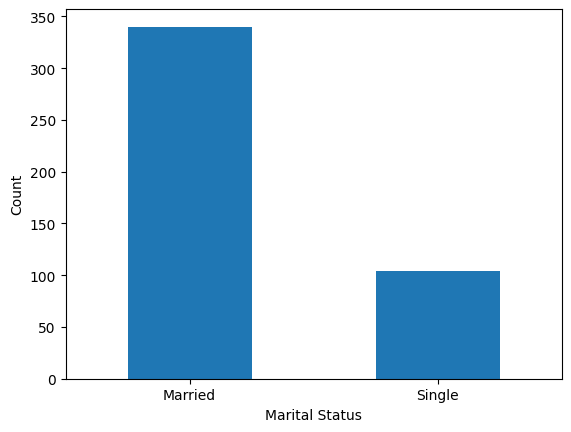

In [14]:
customer['Marital Status'].value_counts().plot(kind='bar', xlabel='Marital Status', ylabel='Count', rot=0)

In [15]:
# fill missing value with the most frequent value of that column
customer['Marital Status']=customer['Marital Status'].fillna(customer['Marital Status'].mode()[0])

In [16]:
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

### transaction

In [17]:
transaction = pd.read_csv('Transaction.csv', sep=';')
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [18]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


question:
what datatype for date

In [19]:
transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

### store

In [20]:
store = pd.read_csv('Store.csv', sep=';')
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [21]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


what is the data type for latitude longitude

In [22]:
store.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

## Merging all data

In [23]:
# merging product and transaction
df1 = pd.merge(product,transaction)
df1.head()

,ProductID,Product Name,Price,TransactionID,CustomerID,Date,Qty,TotalAmount,StoreID
0,P1,Choco Bar,8800,TR1984,183,01/01/2022,4,35200,4
1,P1,Choco Bar,8800,TR35256,160,01/01/2022,7,61600,4
2,P1,Choco Bar,8800,TR63499,118,02/01/2022,7,61600,14
3,P1,Choco Bar,8800,TR7826,181,02/01/2022,10,88000,12
4,P1,Choco Bar,8800,TR61437,123,05/01/2022,4,35200,6


In [24]:
# merging df1 + customer
df2 = pd.merge(df1,customer)
df2.head()

,ProductID,Product Name,Price,TransactionID,CustomerID,Date,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,P1,Choco Bar,8800,TR1984,183,01/01/2022,4,35200,4,27,1,Single,0.18
1,P2,Ginger Candy,3200,TR30598,183,01/05/2022,5,16000,13,27,1,Single,0.18
2,P2,Ginger Candy,3200,TR39885,183,26/10/2022,6,19200,1,27,1,Single,0.18
3,P3,Crackers,7500,TR80016,183,24/01/2022,2,15000,10,27,1,Single,0.18
4,P3,Crackers,7500,TR89318,183,17/07/2022,1,7500,12,27,1,Single,0.18


In [25]:
# merging df2 + store
df3 = pd.merge(df2,store)
df3

,ProductID,Product Name,Price,TransactionID,CustomerID,Date,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude
0,P1,Choco Bar,8800,TR1984,183,01/01/2022,4,35200,4,27,1,Single,0.18,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
1,P1,Choco Bar,8800,TR35256,160,01/01/2022,7,61600,4,48,1,Married,12.57,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
2,P2,Ginger Candy,3200,TR69288,160,24/01/2022,3,9600,4,48,1,Married,12.57,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
3,P6,Cashew,18000,TR91768,160,28/08/2022,1,18000,4,48,1,Married,12.57,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,P6,Cashew,18000,TR28489,160,27/11/2022,4,72000,4,48,1,Married,12.57,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,P7,Coffee Candy,9400,TR43837,180,13/08/2022,6,56400,6,22,1,Married,4.07,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
5016,P5,Thai Tea,4200,TR60092,182,14/10/2022,3,12600,6,44,1,Married,14.57,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
5017,P10,Cheese Stick,15000,TR52555,411,28/04/2022,2,30000,6,19,1,Single,0.00,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
5018,P8,Oat,16000,TR84455,265,10/09/2022,1,16000,6,62,1,Married,9.07,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"


In [26]:
df3.isnull().sum()

ProductID         0
Product Name      0
Price             0
TransactionID     0
CustomerID        0
Date              0
Qty               0
TotalAmount       0
StoreID           0
Age               0
Gender            0
Marital Status    0
Income            0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
dtype: int64

In [27]:
df_merged = df3.copy()

# Feature Engineering
groupby by
date lalu yang di aggregasi adalah qty di sum

In [28]:
df_merged.groupby('Date').agg({'Qty':['sum']})

,Qty
,sum
Date,
01/01/2022,49
01/02/2022,50
01/03/2022,76
01/04/2022,98
01/05/2022,67
...,...
31/05/2022,21
31/07/2022,72


# Modelling